In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os

## Loading Data

In [10]:
data = pd.read_csv("~/Desktop/Capstone_Steelcase/labelled_floorplan_dataset_updated.csv")

In [11]:
def image_path(key):
    return f"Total_Images/{key}/{key}_Top.png"

data['image_path'] = data['key'].apply(image_path)

In [12]:
print(sum(data.label==1)/len(data.label))
print(sum(data.label==-1)/len(data.label))

0.11251098740111339
0.8874890125988866


In [13]:
data

,key,label,image_path
0,006a2d3bb2b7435fb6d96e7f320efe42,-1.0,Total_Images/006a2d3bb2b7435fb6d96e7f320efe42/...
1,00e22bea176c4792a53d5132364ecd52,1.0,Total_Images/00e22bea176c4792a53d5132364ecd52/...
2,01bd5ab8fa0c4a7ab183f9f30f8c9a3a,-1.0,Total_Images/01bd5ab8fa0c4a7ab183f9f30f8c9a3a/...
3,01c1ac1113dc4770a2690dc9e7218859,-1.0,Total_Images/01c1ac1113dc4770a2690dc9e7218859/...
4,034515138be34df3a780bb878eda204d,1.0,Total_Images/034515138be34df3a780bb878eda204d/...
...,...,...,...
3408,0c5ebff3c81849faa7116d1379a6f975,-1.0,Total_Images/0c5ebff3c81849faa7116d1379a6f975/...
3409,0c63ab679de6427cbdbb05f1ba841204,-1.0,Total_Images/0c63ab679de6427cbdbb05f1ba841204/...
3410,0c655ec5de1845ee9981d156a46a827b,-1.0,Total_Images/0c655ec5de1845ee9981d156a46a827b/...
3411,0c65e370201249aab3a237a30b96aad8,-1.0,Total_Images/0c65e370201249aab3a237a30b96aad8/...


- Map Images
- Resize them
- Greyscale/RGB
- Any filters - Lanczos,bilinear,bicubic
- Reduce memory (int16)

## Loading Images

In [18]:
data['image'] = data['image_path'].map(lambda x: np.asarray(Image.open(x).resize((224,224)).convert('L'))) #.convert('L') for greyscale #.convert('RGB') for Color
data['image'] = [arr.astype(np.int16) for arr in data['image']]  #int16  #int8 

# RGB with 16 - default
# RGB with 8
# L with 16 and 8

In [19]:
with open('Processed_data_GS_224x224.pkl', 'wb') as file:
    pickle.dump(data, file)

In [20]:
import pickle
with open('Processed_data_GS_224x224.pkl', 'rb') as file:
    data = pickle.load(file)

(224, 224)

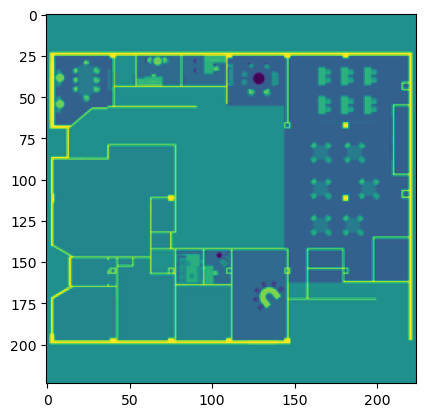

In [26]:
plt.imshow(data.image[12])
data.image[12].shape

In [24]:
data['image'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3413 entries, 0 to 3412
Series name: image
Non-Null Count  Dtype 
--------------  ----- 
3413 non-null   object
dtypes: object(1)
memory usage: 26.8+ KB
